# Ejemplo práctico 2: Sumador de N bits

En este ejemplo llevaremos las ideas aprendidas sobre computación reversible al problema más fundamental de la aritmética:

> ¿Cómo podemos sumar dos números enteros?

En nuestra vida cotidiana estamos tan acostumbrados a realizar este trabajo que incluso llegamos a tener identidades como $2+2=4$ por verdades absolutas. Incluso, cuando utilizamos una calculadore de bolsillo para calcular el costo total de una lista de mercado, asumimos que el resultado que aparece en pantalla es de incuestionable veracidad. Nuestra tarea en esta sesión es introducir un algoritmo sencillo que puede realizar un cmoputador cuántico para resolver este problema fundamental. Antes de realizar la programación de un circuito lógico con *Qiskit*, es prudente analizar el problema a resolver.

## Análisis del problema

En nuestra vida cotidina estamos acostumbrado a la *representación decimal* de los números enteros. Un número arbitrario se define por medio de sus *unidades*, *decenas*, *centenas*, ..., en fin. 

> Usualmente, descomponemos un número arbitrario como una suma de potencias de $10$.

Por medio de un *dígito*, que es un símbolo del conjunto $0,1,2,3,4,5,6,7,8,9$, denotamos la contribución que cada potencia de $10$ debe realizar para construir un entero dado. Por ejemplo, el número que representa la cadena de dígitos "4123" es aquel que se obtiene al realizar las operaciones

$$3 \times 10^0 + 2 \times 10^1 + 1 \times 10^2 + 4 \times 10^3$$

**NOTA:** Esto puede parecer un poco confuso, ya que los mismos símbolos que utilizamos para escribir una cadena que representa un número, los utilizamos para representar operaciones. Sin embargo, asumimos que el lector está suficientemente familiarizado con la aritmética básica como para que se logre comunicar la esencia del ejemplo. Por convención, los dígitos que representan potencias de diez se escriben de izquierda a derecha, de mayor a menor potencia.

Cuando realizamos la adición de dos números, hacemos la suma *por columnas*. Esto es, sumamos las unidades del primero con las unidades del segundo; las decenas del primero, con las del segundo; y así sucesivamente. Esto se ilustra mejor con un ejemplo gráfico

![png](Lec_1_Sumador_files/ExampleSum.png)

Aquí, utilizamos las reglas simbólicas

$$1 + 1 = 2$$
$$2 + 3 = 5$$
$$3 + 4 = 7$$

Y simplemente realizamos la adición de *unidades*, *decenas* y *centenas* por columnas. En algunos casos, las reglas de adición de dígitos que representan números menores que $10$ pueden producir números que necesitan representarse por medio de dos dígitos. Este es el caso de reglas como

$$1 + 9 = 10$$
$$6 + 6 = 12$$
$$7 + 4 = 11$$

En estos casos, las relgas para sumar que hemos interiorizado desde el preescolar nos dicen que devemos *llevar uno*. Es decir, adicionar $1$ al resultado de la suma de los dígitos que representan la *siguiente* potencia de 10. 

> Las reglas para sumar números enteros se basan en dos tipos de reglas fundamentales: las que nos dicen cómo sumar dos dígitos, y aquellas que nos dicen cómo sumar tres dígitos (las *columnas* de dos números y la *lleva*).

En esta sección no resumiremos estas reglas. Sin embargo, el algoritmo de suma de dos enteros es bastante directo:

> 1. Determine cuál es la potencia de $10$ más grande del número mayor y rellene con ceros a la izquierda el número menor hasta que ambos tengan el mismo número de dígitos.
1. Sume los dígitos de las unidades (los de más de la derecha), utilizando una regla de suma de 2 dígitos. Anote el resultado de la suma debajo de la columna de las unidades del resultado. Anote la *lleva* aparte.
1. Sume los dígitos de la siguiente potencia de $10$ y la *lleva* por medio de una regla de suma de 3 dígitos. Anote el resultado de la suma debajo de la columna correspondiente. Anote la *lleva* aparte.
1. Repita el proceso anterior hasta la última potencia de $10$ del número con más dígitos. Si el resultado tiene una lleva que no se representa con $0$, escríbala en una nueva columna a la izquierda del resultado.

Al ejecutar este algoritmo, es posible calcular la suma de dos enteros. Como vimos anteriormente, un circuito lógico emplea un *alfabeto binario*, de modo que no es práctico representar un número en potencias de $10$. En la siguiente subsección, revisaremos cómo codificar un número entero arbitrario utilizando un alfabeto binario compuesto por los símbolos $\{0,1\}$, e implementar el algortimo anterior.

## Algoritmo de suma en un alfabeto binario

Para poder representar un número entero de forma eficiente en un circuito lógico, utilizaremos la denominada *representación binaria*. En lugar de emplear potencias de 10 para expresar un entero arbitrario, utilizaremos potencias de 2. Los símbolos de nuestro alfabeto representaran la identidad multiplicativa ($1$) y unidad aditiva ($0$) de las operaciones de multiplicación y adición. Así, el número representado por $10$ en decimal, corresponde a

$$0 \times 2^0 + 1 \times 2^1 + 0 \times 2^2 + 1 \times 2^3$$

Seguiremos la misma convención que utilizamos para representar un número como cadena decimal, para representarlo como cadena binaria. De modo que podemos establecer la equivalencia

$$10_{10} = 1010_{2}$$

Donde el subíndice denota la representación (binaria o decimal) que estamos utilizando. El proceso de sumar dos enteros es precisamente el descrito anteriormente. Sin embargo, debido a que trabajamos con un alfabeto más reducido, no es difícil establecer las reglas para sumar dos dígitos:

$$0_2 + 0_2 = 0_2$$
$$0_2 + 1_2 = 1_2$$
$$1_2 + 0_2 = 1_2$$
$$1_2 + 1_2 = 10_2$$

Las reglas para sumar tres dígitos se deducen de las reglas para sumar dos dígitos y la definición razonable

$$1_2 + 10_2 = 10_2 + 1_2 = 11_2$$

A partir de este momento, asumimos que los números enteros se representan como una cadena binaria. Para realizar la suma, por tanto, necesitamos algoritmos para calcular las reglas de dos y tres bits. El lector debe convencerse que si podemos implementar estas reglas, y conectarlas en cascada, reproduciremos la receta de suma que todos conocemos desde la infancia. Vale la pena, sin embargo, realizar dos observaciones:

1. Si sumamos dos cadenas de $n$-bits, en general, el resultado se representará por una cadena de $n+1$-bits
1. Si es posible sumar dos números enteros, la propiedad de asociatividad de la adición de enteros implica que es posible sumar cuálquier cantidad de números enteros.

## Implementación de una posible solución en Qiskit

Debido a que las reglas de suma se entienden mejor prácticando, recomendamos seguir esta lección iteractivamente desde nuestro entorno interactivo haciendo click en el siguiente botón. Recomendamos realizar una lectura rápida de este post antes de la práctica para tener una idea de la esencia del algorimo.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/QC-FEM/QC-CrashCourse/HEAD)

### Importación de librerías

En este punto realizaremos la importación de librerías tal como en ejemplos anteriores. Para una discusión detallada del significado de cada comando, sugerimos revisar nuestra lección sobre cadenas palíndromas.

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute, Aer

### Reglas para sumar dos bits: Half Adder (HA)

Como vimos anteriormente, necesitamos conocer las reglas para sumar dos bits si queremos sumar dos enteros. Las presentamos a continuación:

$$0 + 0 = 00$$
$$0 + 1 = 01$$
$$1 + 0 = 01$$
$$1 + 1 = 10$$

**NOTA:** Escribimos el resultado como una cadena de dos bits puesto que sumamos números representados por cadenas de un bit. Denotaremos la suma de dos bits genéricamente por $b_0 + b_1 = q_1q_0$

Si aislamos la columna que representa las unidades y resuminos una tabla, podemos observar un patrón

|$b_0$|$b_1$|$q_0$|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

Podemos utilizar una compuerta **XOR** para calcular el bit de las unidades $q_0$. Si repetimos el mismo proceso con la columna $q_1$, un patrón sencillo emerge

|$b_0$|$b_1$|$q_1$|
|:-:|:-:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

Podemos utilizar una compuerta **AND** para calcular el bit de las "decenas" $q_1$. Sabemos que las compuertas reversibles que simulan estas compuertas son **CNOT** y **CCNOT**. Debido a que tanto **AND** como **XOR** son compuertas *irreversibles*, necesitaremos un bit adicional para poder sumar dos bits. La secuencia de compuertas que permiten realizar esta operación se denomina **Half Adder**, por razones que veremos más adelante.

#### Implementación de un HA con Qiskit

El HA es una operación que repetiremos varias veces cuando implementemos el algoritmo de suma completo. Por tal razón, definiremos un *conjunto de instrucciones* por medio de Qiskit. Esta podremos llamarla dentro de un circuto más grande cuando sea necesario. Antes de ello, podemos explorar un poco la forma como funciona un HA.

##### Circuito de HA

Primero declaramos un registro cuántico que contendrá los bits a sumar

In [19]:
## Registro de bits
bits = QuantumRegister(2,name='b')

Como se mencionó anteriormente, necesitaremos un bit de adicional, puesto que el cómputo debe ser reversible. Invitamos al lector a reflexionar sobre la necesidad de este bit

In [20]:
## Registro ancila
q_1 = QuantumRegister(1,name='r')

Ahora declaramos un circuito cuántico, e incluimos las instrucciones necesarias para implementar un HA en Qiskit

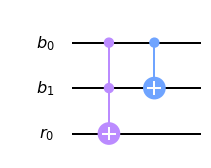

In [21]:
## Declaramos circuito cuántico
qc_HA = QuantumCircuit(bits,q_1)
## Utilizamos AND para calcular q_1
qc_HA.ccx(bits[0],bits[1],q_1)
## Utilizamos XOR para calcular q_0
qc_HA.cx(bits[0],bits[1])
## Dibujamos el circuito
qc_HA.draw(output='mpl')

Invitamos al lector a convencerse de que $r_0 = q_1$ y $b_1 = q_0$ después de la ejecución del circuito anterior. Por claridad en la exposición del algoritmo, deseamos construir un HA que mantenga intactos los bits a sumar. Así que simplemente incrementamos el tamaño del registro auxiliar. Esto se ilustra en la siguiente celda

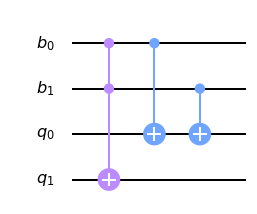

In [22]:
## Extendemos registro auxiliar
suma = QuantumRegister(2,name='q')
## Declaramos circuito cuántico
qc_HA = QuantumCircuit(bits,suma)
## Utilizamos AND para calcular q_1
qc_HA.ccx(bits[0],bits[1],suma[1])
## ¿Por qué necesitamos este paso?
qc_HA.cx(bits[0],suma[0])
## Utilizamos XOR para calcular q_0
qc_HA.cx(bits[1],suma[0])
## Dibujamos el circuito
qc_HA.draw(output='mpl')

Por el momento, definiremos un *conjunto de instrucciones* que nos permitirá insertar un HA dentro de nuestra rutina general cuando deseemos. Esto se aclarará más adelante.

In [23]:
## Convertir circuito a conjunto de instrucciones
HA = qc_HA.to_gate(); HA.name = 'HA';

Nuestra afirmación es que en el registro ```suma```, se encuentra la representación binaria de la suma de los bits de entrada. Invitamos al lector a comprobar esta aseveración utilizando el simulador de Qiskit.

### Reglas para sumar tres bits: Full Adder (FA)

No perdamos la perspectiva. Desde preescolar sabemos que si somos capaces de sumar 3 dígitos, somos capaces de sumar cualquier par de números enteros. En esta sección completaremos este paso clave, construyendo sobre lo que sabemos del HA. Invitamos al lector a convencerse de que la suma de 3 números de 1 bit es un número que se representa por una cadena de 2 bits. ¿Cómo podemos utilizar el HA para construir un circuito que sume 3 bits?

Consideremos los posibles resultados de sumar un bit a una cadena binaria que es el resultado de un HA. Empecemos sumando 0

$$0 + 00 = 00$$
$$0 + 01 = 01$$
$$0 + 10 = 10$$

Procedamos sumando 1

$$1 + 00 = 01$$
$$1 + 01 = 10$$
$$1 + 10 = 11$$

Denotamos una suma de este tipo de forma genérica por $c + b_1b_0 = q_1q_0$. Notamos un patrón importante al considerar $q_0$. Este puede representarse por $c \oplus b_0$. Invitamos al lector a convencerse de que $q_1 = b_1 \oplus (b_0 \land c)$.

> Podemos construir un FA utilizando el mismo principio que el HA, y añadiendo una compuerta CCNOT y otra CNOT.

Procedemos a construir un FA partiendo del HA en Qiskit. Invitamos al lector a corroborar que este circuito realiza las operaciones de un FA utilizando el simulador de Qiskit.

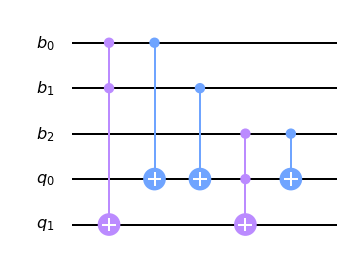

In [24]:
## Definimos registro auxiliar
suma = QuantumRegister(2,name='q')
## Definimos registro con bits
bits = QuantumRegister(3,name='b')
## Declaramos circuito cuántico
qc_FA = QuantumCircuit(bits,suma)
## EMPEZAMOS CON UN HA
## Utilizamos AND para calcular q_1
qc_FA.ccx(bits[0],bits[1],suma[1])
## ¿Por qué necesitamos este paso?
qc_FA.cx(bits[0],suma[0])
## Utilizamos XOR para calcular q_0
qc_FA.cx(bits[1],suma[0])
## AÑADIMOS LA CCNOT Y CNOT PARA EL FA
qc_FA.ccx(bits[2],suma[0],suma[1])
qc_FA.cx(bits[2],suma[0])
## Dibujamos el circuito
qc_FA.draw(output='mpl')

Esta es una operación que realizaremos bastante, así que definiremos un *conjunto de instrucciones* que utilizaremos en nuestro algoritmo completo para sumar dos enteros arbitrarios.

In [17]:
## Convertir circuito a conjunto de instrucciones
FA = qc_FA.to_gate(); FA.name = 'FA'

## Implementación del algoritmo

Repetimos los pasos que hemos establecido para sumar dos números con representación binaria de $n$ bits:

> 1. Determine cuál es la potencia de $2$ más grande del número mayor y rellene con ceros a la izquierda el número menor hasta que ambos tengan el mismo número de dígitos.
1. Sume los dígitos de las unidades (los de más de la derecha), utilizando una regla de suma de 2 dígitos. Anote el resultado de la suma debajo de la columna de las unidades del resultado. Anote la *lleva* aparte.
1. Sume los dígitos de la siguiente potencia de $2$ y la *lleva* por medio de una regla de suma de 3 dígitos. Anote el resultado de la suma debajo de la columna correspondiente. Anote la *lleva* aparte.
1. Repita el proceso anterior hasta la última potencia de $2$ del número con más dígitos. Si el resultado tiene una lleva que no se representa con $0$, escríbala en una nueva columna a la izquierda del resultado.

Al igual que en un algoritmo normal de suma, necesitaremos tres tipos de bits:

1. Bits para ingresar el primer sumando ($n$ bits)
1. Bits para ingresar el segundo sumando ($n$ bits)
1. Bits para guardar la *lleva* ($n-1$ bits)
1. Bits donde guardar la suma ($n+1$ bits)

La implmentación del circuito puede ser un poco truculenta, así que realizaremos una discusión breve que esperamos sea un poco más clara al momento de visualizar el circuito. 

Representemos los dos números a sumar por las cadenas $a_{n-1} \cdots a_0$ y $b_{n-1} \cdots b_0$. Representemos la suma por $q_{n-1} \cdots q_0$. Guardaremos la lleva en un registro que denotaremos por $c_{n-2} \cdots c_0$

**IMPORTANTE:** La numeración que utilizamos aquí es consistente con la numeración de Qiskit. Esto es importante a la hora de inicializar los registros.

En una primera instancia, calcularemos $q_0$ por medio de un HA, que actuará sobre $a_0$, $b_0$, $q_0$ y $c_0$. Guardaremos la *leva* en $c_0$. Calcularemos $q_1$ por medio de un FA que actuará sobre $a_1$, $b_1$, $c_0$, $q_1$ y $c_1$. Guardaremos la lleva en $c_1$. Procederemos iterativamente, de modo que calculemos $q_i$ por medio de un FA que actuará sobre $a_i$, $b_i$, $c_{i-1}$ y $c_i$, guardando la lleva en $c_i$. El último FA calculará $q_{n-1}$ actuando sobre $a_n$, $b_n$, $c_{n-2}$, $q_{n-2}$ y $q_{n-1}$.

Para que el algoritmo pueda visualizarse mejor, crearemos un registro global, que denotaremos por $r$, con $4n$ bits. Llevaremos la siguiente convención:

1. $r_{4i}$ contendrá el valor de $a_i$
1. $r_{4i+1}$ contendrá el valor de $b_i$
1. $r_{4i+2}$ contendrá el valor de $q_i$
1. $r_{4i+3}$ contendrá el valor de $c_i$

Si bien esto puede ser un poco confuso, esperamos que al visualizar el circuito sea más fácil ver el detalle de la implementación del algoritmo. 

> En primera instancia, demostraremos el algoritmo con un circuito para sumar números de 3 bits. Posteriormente crearemos una secuencia de instrucciones que permitirá sumar dos números de $n$ bits, con $n$ arbitrario.

Para utilizar las instrucciones HA y FA que hemos definido previamente, emplearemos la función miembro ```circuito.append(Inst,reg)```. Esta función tiene dos argumentos: 1) La instrucción a llevar a cabo y 2) la lista de bits donde va a actuar la instrucción.

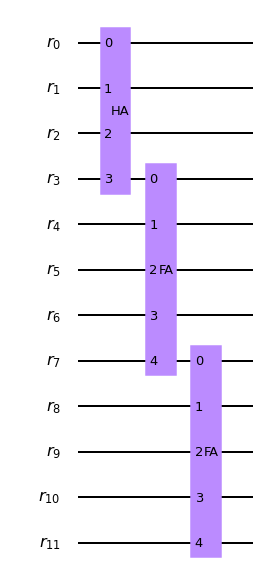

In [133]:
n = 3
## Inicializamos el registro de operaciones
r = QuantumRegister(4*n,name='r')
## Creamos el circuito cuántico
qc_Suma = QuantumCircuit(r)
## EMPEZAMOS CON EL HA
## Esta es la primera etapa que hablamos
qc_Suma.append(HA,[r[0],r[1],r[2],r[3]])
## CONTINUAMOS CON LOS FA
## Esta es la etapa iterativa
for idx in range(4,4*n,4):
    try:
        qc_Suma.append(FA,[r[idx-1],r[idx],r[idx+1],r[idx+2],r[idx+3]])
    except:
        continue
## Dibujamos el circuito
qc_Suma.draw(output='mpl')

Recomendamos al lector interiorizar muy bien la función que cumplen los conjuntos de instrucciones HA y FA, así como el código de numeración que empleamos para definir los registros. Una vez interiorizada la discusión anterior, procedemos a definir un conjunto de instrucciones que representa el algoritmo de suma que hemos planteado.

In [29]:
## Definimos un algoritmo que suma dos numeros de nbits bits
def AlgoritmoSuma(nbits):
    '''
    Secuencia de instrucciones para
    realizar la suma de perescolar
    en representación binaria
    '''
    ## Inicializamos el registro de operaciones
    r = QuantumRegister(4*nbits,name='r')
    ## Creamos el circuito cuántico
    qc_Suma = QuantumCircuit(r)
    ## EMPEZAMOS CON EL HA
    ## Esta es la primera etapa que hablamos
    qc_Suma.append(HA,[r[0],r[1],r[2],r[3]])
    ## CONTINUAMOS CON LOS FA
    ## Esta es la etapa iterativa
    for idx in range(4,4*nbits,4):
        try:
            qc_Suma.append(FA,[r[idx-1],r[idx],r[idx+1],r[idx+2],r[idx+3]])
        except:
            continue
    ## Retornamos la secuencia de instrucciones
    qc_S = qc_Suma.to_gate()
    qc_S.name = 'Suma'
    return qc_S

### Inicialización del registro

En este punto, no hemos inicializado el registro de entrada, así que el algoritmo de suma no realiza ningún cambio. Recordemos que Qiskit inicializa sus registros en estado 0 por defecto. En esta etapa temprana, cargaremos dos cadenas binarias conviertiendo un número entero a su representación binaria y aplicando compuertas **NOT** a los bits que corresponden a $a_{n-1} \cdots a_0$, $b_{n-1} \cdots b_0$.

Primero, construimos una función que transforme un número entero decimal, a representación binaria de $n$ bits.

In [30]:
## Función para convertier decimal -> binario
def decAbin(num,nbits):
    '''
    Función para convertir entero 
    en cadena binaria
    '''
    return "{0:b}".format(num).zfill(nbits)

Ahora podemos crear nuestro algoritmo de inicialización

In [116]:
## Instrucciones para inicializar la cadena
def Inicializar(nbits,a,b):
    '''
    Secuencia de instrucciones para
    cargar dos numeros enteros en el
    circuito de suma
    '''
    ## Inicializamos el registro de operaciones
    r = QuantumRegister(4*nbits,name='r')
    ## Creamos el circuito cuántico
    qc_Ini = QuantumCircuit(r)
    ## CONVERTIMOS LOS NÚMEROS EN CADENAS BINARIAS
    abin = decAbin(a,nbits)
    bbin = decAbin(b,nbits)
    ## Inicializamos la cadena (RECORDAR ORDEN DE QISKIT)
    for idx in range(nbits-1,-1,-1):
        try:
            ## Cargamos abin en la parte correspondiente del registro
            if abin[idx] == '1':
                qc_Ini.x(r[4*(idx-nbits+1)])
            if bbin[idx] == '1':
                qc_Ini.x(r[4*(idx-nbits+1)+1])
        except:
            continue
    ## Retornamos la secuencia de instrucciones
    qc_I = qc_Ini.to_gate()
    qc_I.name = 'Ini'
    return qc_I

Probamos el funcionamiento de las rutinas generando un circuito lógico que implemente la inicialización con $n = 2$. Caragamos los números $a = 3_{10}$ y $b = 2_{10}$. Invitamos al lector a comprobar que la inicialización es correcta.

**Nota:** Cuando una secuencia de instrucciones actúa sobre un registro, podemos pasar este último como argumento a la función ```circuito.append(Inst,reg)```. Para visualizar las compuertas que componen una instrucción, utilizamos la función miembro ```circuito.decompose()```.

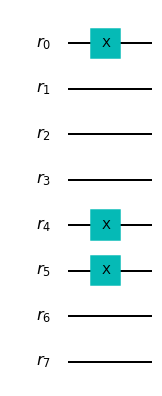

In [126]:
n = 2
## Inicializamos el registro de operaciones
r = QuantumRegister(4*n,name='r')
## Creamos el circuito cuántico
qc_Suma = QuantumCircuit(r)
## Creamos algoritmo de inicialización
qc_Suma.append(Inicializar(n,3,2),r)
## Dibujamos el circuito
qc_Suma.decompose().draw(output='mpl')

## Realización de un ejemplo

Ahora que hemos podido implementar nuestro algoritmo de suma e inicializar el registro de entrada, es momento de realizar un ejemplo práctico. Para ello, realizaremos un circuito en el cual

1. Inicializaremos el registro con los números $a = 10_{10}$ y $b = 15_{10}$.
1. Implementaremos nuestro algoritmo de medición.
1. Mediremos el resultado de la suma en un registro clásico.
1. Simularemos el circuito con Qiskit.

### Inicialización del circuito

Notemos que se necesitan 4 bits para representar $a$ y $b$., de modo que debemos inicializar un registro ```r``` de 16 bits. La suma $q = 25$ necesita 5 bits para una representación binaria. Por tanto, el registro de medición debe tener 5 bits

In [127]:
a = 10
b = 15
## Bits necesarios para representar a y b
n = 4

In [128]:
## Creamos registro cuántico para procesar la suma
r = QuantumRegister(4*n,name='r')
## Creamos registro clásico para medir la suma
s = ClassicalRegister(n+1,name='s')
## Creamos circuito cuántico
qc_Suma = QuantumCircuit(r,s)
## Inicializamos los numeros a y b
qc_Suma.append(Inicializar(n,a,b),r)
## Implementamos el algoritmo de suma
qc_Suma.append(AlgoritmoSuma(n),r)
## Creamos la lista con los bits q_1
suma = [r[4*idx+2] for idx in range(n)]
suma.append(r[-1])         ## ¿Por qué?
## Medimos el resultado
qc_Suma.measure(suma,s)

### Simulación del circuito

El circuito anterior los simularemos localmente. Para ello, utilizaremos el ```qasm_simulator``` de Qiskit. En lugar de dibujar el histograma de resultados, recuperaremos directamente la cadena binaria que produce la simulación. Los resultados de una simulación se consolidan en un diccionario de Python. Las claves de este diccionario son las cadenas binarias que serían producidas por un procesador cuántico ideal. Por el momento no es necesario preocuparse por estos aspectos.

Procedemos a realizar la simulación ejecutando los siguientes comandos.

In [130]:
backend = Aer.get_backend('qasm_simulator')
resultados = execute(qc_Suma,backend,shots=2048).result().get_counts()

Finalmente, imprimimos la cadena que nuestro algoritmo ha computado como suma

In [131]:
print(resultados)

{'11001': 2048}


Y la comparamos con la cadena que corresponde con la representación binaria de $25_{10}$

In [132]:
print(decAbin(a+b,n+1))

11001


**IMPORTANTE:** Si el lector se encuentra revisando el notebook de Jupyter que tenemos en nuestro entrono de JupyterHub, le invitamos a probar el algoritmo con distintas cadenas y corroborar que en efecto funciona.

## Perspectivas

1. En esta implementación no hemos realizado el descómputo. ¿Puede el lector limpiar los bits que no codifican los bits de los sumandos?
1. Es deseable tener un algoritmo que tenga la menor complejidad en espacio ¿Puede el lector implmentar un HA y un FA que no necesiten bits de ancila?
1. Pero también es deseable tener ancila limpia ¿Puede el lector disminuir el número de bits auxiliares y realizar el descómputo?
1. ¿Existe una forma de realizar el algoritmo anterior sin bits de ancila utilizando computación clásica reversible?
1. Invitamos al lector a proponer un algoritmo reversible totalmente diferente y compartirlo por medio de nuestro correo oficial. Las respuestas más interesantes será publicada en la página oficial de QC-FEM, con la acreditación correspondiente.

## Referencias

* Nielsen & Chuang. Quantum Computation and Quantum Information. Cambridge University Press, 2010.
* E. Rieffel & W. Polak. Quantum Computing: A Gentle Introduction. MIT Press, 2011.
* G. Beneti, G. Casati & G. Strini. Principles of Quantum Computation and Information. Vol. I: Basic Concepts. World Scientific, 2004.
* V. Silva. Practical Quantum Computing for Developers. Apress, 2018.
* T. Norsen. Foundations of Quantum Mechanics. An Exploration of the Physical Meaning of Quantum Theory. Springer, 2017.

Muchas gracias por leer esta publicación! Abajo se encuentran links a las lecciones siguientes en el Crash Course de QC-FEM.